In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
df = pd.read_csv('university_data1.csv')
df.describe()
df.head()

,GRE Score,GPA,IELTS Score,Research Paper,University Ranking,University Name,Admit Probability
0,45,1.6,4.9,20,48,McMaster University,0.28
1,326,0.4,8.3,71,66,University of Western Ontario,0.97
2,25,3.6,5.4,50,68,Thompson Rivers University,0.37
3,311,2.4,1.7,17,2,University of New Brunswick,0.40
4,243,2.9,2.5,66,99,University of Calgary,0.40


In [3]:
df['University Name'].nunique()

48

In [4]:
df.shape

(1000, 7)

In [5]:
def righter(data):
    data=data%10
    return data

df['Research Paper']=df['Research Paper'].apply(righter)

In [6]:
df['Research Paper'].unique()

array([0, 1, 7, 6, 3, 2, 9, 8, 4, 5], dtype=int64)

In [7]:
X = df.drop(['University Name', 'Admit Probability','University Ranking'], axis=1)
y_binary = (df['Admit Probability'] >= 0.8).astype(int)

In [8]:
# Convert to binary classification based on a threshold (e.g., 0.8)
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(df['University Name'])

In [9]:
numerical_features = ['GRE Score', 'GPA', 'IELTS Score', 'University Ranking']
categorical_features = []  # Since 'Research Experience' is dropped

In [10]:
X_train, X_test, y_train_binary, y_test_binary, y_train_label_encoded, y_test_label_encoded = train_test_split(
    X, y_binary, y_label_encoded, test_size=0.2, random_state=42
)

In [11]:
X_train

,GRE Score,GPA,IELTS Score,Research Paper
29,291,2.6,5.7,0
535,137,0.5,8.4,5
695,109,1.9,1.9,4
557,79,1.9,0.6,0
836,321,3.1,7.0,1
...,...,...,...,...
106,239,3.3,3.4,4
270,64,3.9,1.9,3
860,27,1.2,5.8,6
435,236,3.7,0.6,3


In [12]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2,3, 10, 20],
    'min_samples_split': [10,14],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3)
rf_grid.fit(X_train, y_train_label_encoded)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [10, 14],
                         'n_estimators': [50, 100, 200]})

In [13]:
rf_grid.best_params_

{'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 100}

In [14]:
y_pred_rf = rf_grid.predict(X_test)
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
print("RandomForestClassifier Accuracy:", accuracy_rf)

RandomForestClassifier Accuracy: 0.0


In [15]:
# with open('random_forest_model.pkl', 'wb') as rf_file:
#     pickle.dump(rf_grid.best_estimator_, rf_file)

In [16]:
xgb_param_grid = {
    'n_estimators': [35,40,45,50],
    'max_depth': [2,3,4],
    'learning_rate': [0.007,0.008,0.009]
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42), param_grid=xgb_param_grid, cv=3)
xgb_grid.fit(X_train, y_train_label_encoded)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.007, 0.008, 0.009],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [35, 40, 45, 50]})

In [17]:
X_train

,GRE Score,GPA,IELTS Score,Research Paper
29,291,2.6,5.7,0
535,137,0.5,8.4,5
695,109,1.9,1.9,4
557,79,1.9,0.6,0
836,321,3.1,7.0,1
...,...,...,...,...
106,239,3.3,3.4,4
270,64,3.9,1.9,3
860,27,1.2,5.8,6
435,236,3.7,0.6,3


In [18]:
y_train_label_encoded

array([46, 15,  8, 24, 32, 18, 41, 38, 44, 27, 28, 20,  7, 46, 23, 28, 22,
        6, 29, 18, 35, 39, 32, 40, 11, 20, 36, 29, 21, 46,  5, 16, 27, 37,
       16, 34, 26, 14,  3, 34, 32, 33, 19,  1,  3, 35, 22, 30, 22, 41,  4,
       13, 17,  2,  6, 40, 31,  2, 23, 37, 34, 44, 40,  8, 10, 32,  1,  0,
       37, 47, 30, 21, 33, 20, 32, 38, 20, 13,  8, 25, 41, 22, 26,  2, 21,
        4, 14, 15, 39, 42, 42, 17,  4, 14, 41, 10, 20, 42,  1, 38, 32, 40,
       24, 45,  1, 19,  4, 13, 16,  4, 10, 20, 29, 26, 18, 30,  2, 38,  9,
       14, 24,  4, 15, 18, 22, 26, 14,  4, 17, 17, 21, 26, 43, 24, 10, 31,
       25, 12, 36, 45, 24, 25, 28, 16, 16, 24, 19, 13, 41, 40, 18, 12, 42,
       22, 14, 45, 20, 37, 23, 38, 27,  9, 17,  5, 13, 13, 35, 47, 14,  2,
       40, 12, 40, 13, 30, 40, 26, 38, 27,  9, 34, 14, 17, 12, 25, 36,  3,
       15, 36, 26, 30, 39, 24, 45, 44, 22, 21, 21, 44, 35, 25, 19, 11, 22,
        7, 19, 23,  3,  0, 42, 22,  8, 29, 40, 31, 37, 29, 45, 38, 25, 29,
       27, 29,  2, 32, 34

In [19]:
xgb_grid.best_params_

{'learning_rate': 0.008, 'max_depth': 2, 'n_estimators': 50}

In [20]:
xgb_grid.best_score_

0.019998498117954063

In [21]:
catboost_param_grid = {
    'iterations': [45,50,55],
    'depth': [4,5, 6],
    'learning_rate': [0.009,0.01, 0.1]
}

catboost_grid = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0), param_grid=catboost_param_grid, cv=3)
catboost_grid.fit(X_train, y_train_label_encoded)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002CB02959CD0>,
             param_grid={'depth': [4, 5, 6], 'iterations': [45, 50, 55],
                         'learning_rate': [0.009, 0.01, 0.1]})

In [22]:
y_train_label_encoded

array([46, 15,  8, 24, 32, 18, 41, 38, 44, 27, 28, 20,  7, 46, 23, 28, 22,
        6, 29, 18, 35, 39, 32, 40, 11, 20, 36, 29, 21, 46,  5, 16, 27, 37,
       16, 34, 26, 14,  3, 34, 32, 33, 19,  1,  3, 35, 22, 30, 22, 41,  4,
       13, 17,  2,  6, 40, 31,  2, 23, 37, 34, 44, 40,  8, 10, 32,  1,  0,
       37, 47, 30, 21, 33, 20, 32, 38, 20, 13,  8, 25, 41, 22, 26,  2, 21,
        4, 14, 15, 39, 42, 42, 17,  4, 14, 41, 10, 20, 42,  1, 38, 32, 40,
       24, 45,  1, 19,  4, 13, 16,  4, 10, 20, 29, 26, 18, 30,  2, 38,  9,
       14, 24,  4, 15, 18, 22, 26, 14,  4, 17, 17, 21, 26, 43, 24, 10, 31,
       25, 12, 36, 45, 24, 25, 28, 16, 16, 24, 19, 13, 41, 40, 18, 12, 42,
       22, 14, 45, 20, 37, 23, 38, 27,  9, 17,  5, 13, 13, 35, 47, 14,  2,
       40, 12, 40, 13, 30, 40, 26, 38, 27,  9, 34, 14, 17, 12, 25, 36,  3,
       15, 36, 26, 30, 39, 24, 45, 44, 22, 21, 21, 44, 35, 25, 19, 11, 22,
        7, 19, 23,  3,  0, 42, 22,  8, 29, 40, 31, 37, 29, 45, 38, 25, 29,
       27, 29,  2, 32, 34

In [23]:
catboost_grid.best_params_

{'depth': 4, 'iterations': 50, 'learning_rate': 0.009}

In [24]:
catboost_grid.best_score_

0.030000093867627874

In [25]:
with open('modelCANADA.pkl', 'wb') as xgb_file:
    pickle.dump(catboost_grid.best_estimator_, xgb_file)

In [26]:


with open('label_encoderCANADA.pkl', 'wb') as label_encoder_file:
    pickle.dump(label_encoder, label_encoder_file)

In [27]:
df = pd.read_csv('university_data1.csv')

# Data Exploration and Visualization

# Exclude non-numeric columns before creating the correlation heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_df = df[numeric_columns]

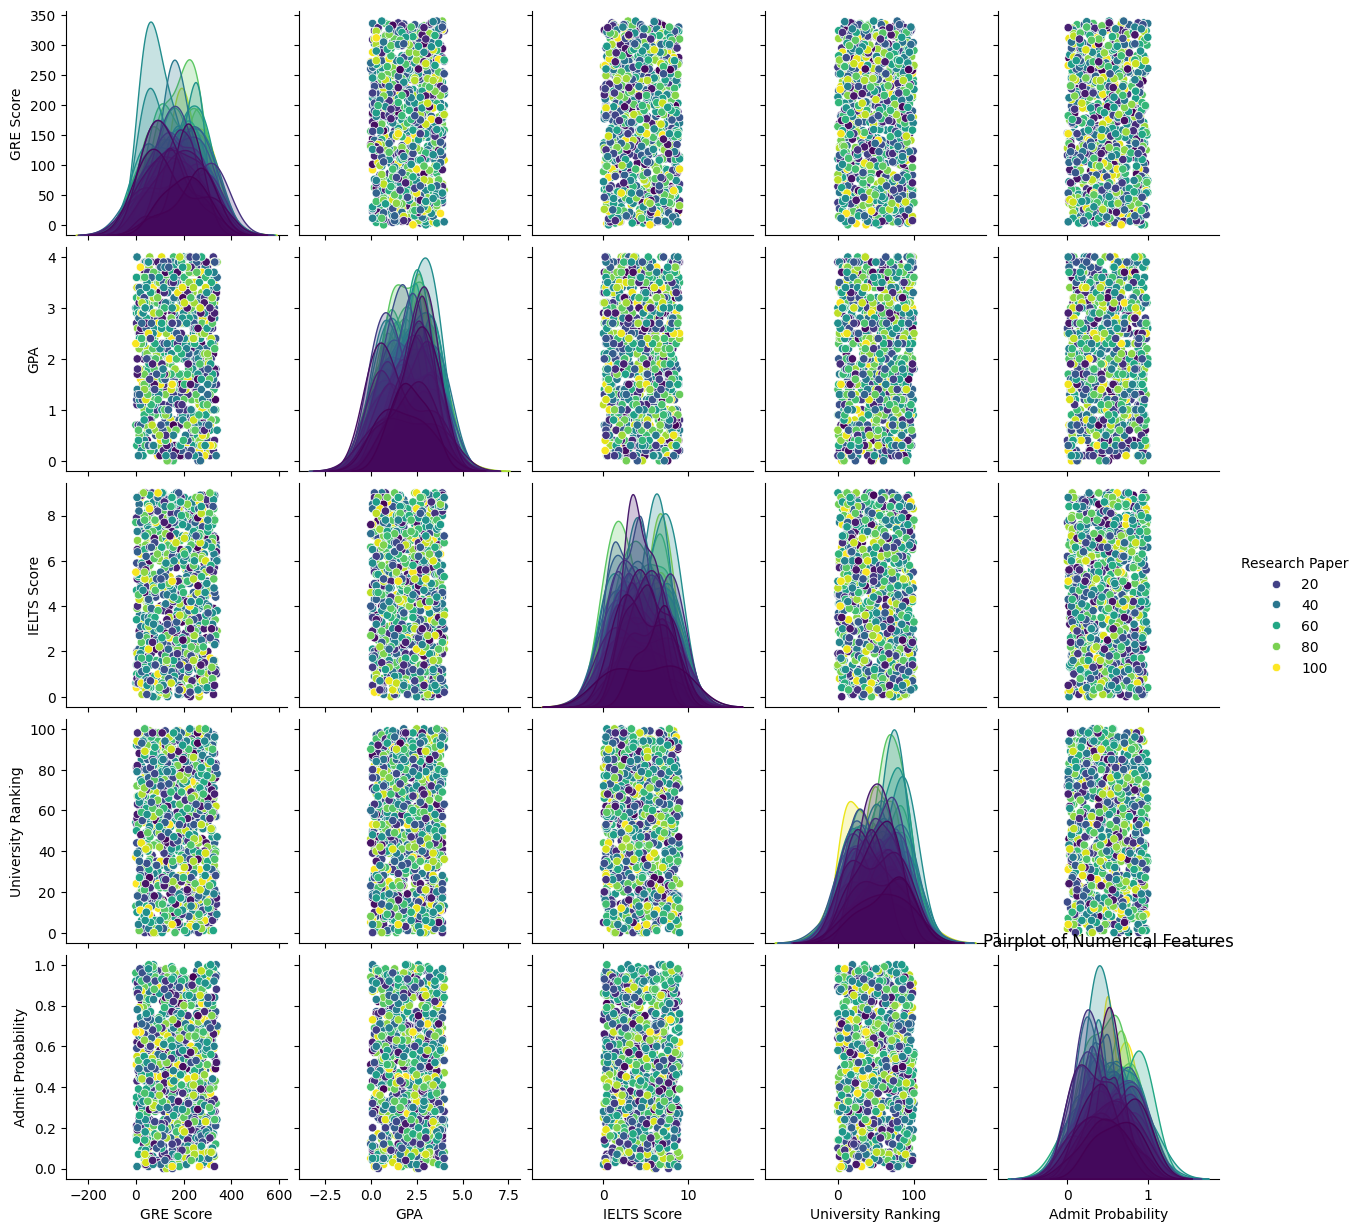

In [28]:
sns.pairplot(df, hue='Research Paper', palette='viridis')
plt.title('Pairplot of Numerical Features')
plt.show()

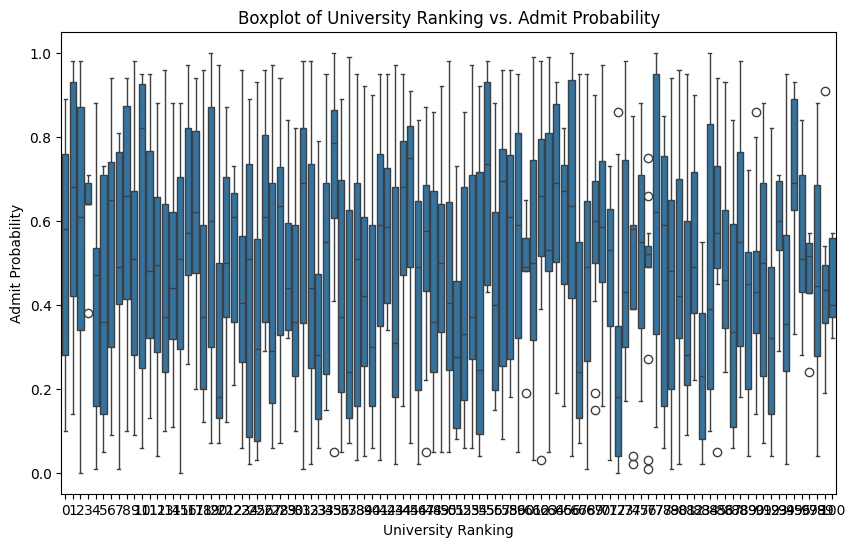

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='University Ranking', y='Admit Probability', data=df)
plt.title('Boxplot of University Ranking vs. Admit Probability')
plt.show()

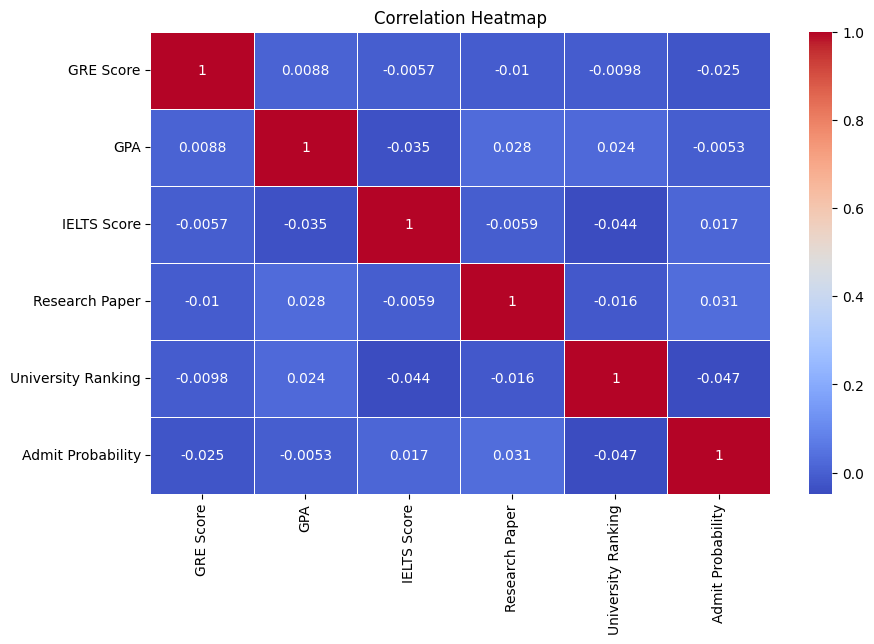

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


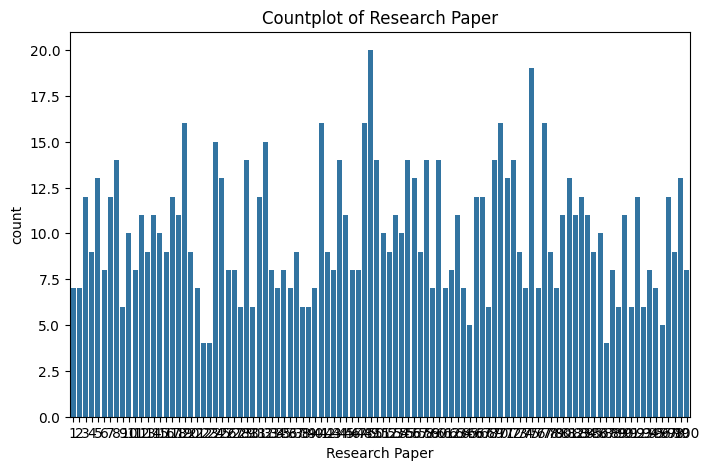

In [31]:
# Countplot for Research Experience
plt.figure(figsize=(8, 5))
sns.countplot(x='Research Paper', data=df)
plt.title('Countplot of Research Paper')
plt.show() 